# 3. Calidad de un vino

Dentro de las muchas variedades de vino existentes, algunas gustan m´as que otras, esto es debido al gusto
de una persona en particular o bien a la gran cantidad de qu´ımicos y procesos que se aplican a la producci´on
de vino. Para el ´area de negocios, el estimar cu´al es la calidad de un vino en base a la apreciaci´on del p´ublico
es una tarea bastante dif´ıcil.
Para esta actividad se trabajar´a con dos datasets asociados a las variantes tinto y blanco del vino portugu´es
”Vinho Verde”[4]. Debido a temas privados solo se cuenta con las caracter´ıstcas fisioqu´ımicas asociadas a un
vino en particular, los cuales corresponden a 11 atributos num´ericos descritos en el siguiente link.
Este problema puede ser abordado como clasificaci´on de 11 clases o de regresi´on, ya que el atributo a estimar,
quality, es un valor entero entre 0 y 10.

(a) Carge los dos dataset en un ´unico dataframe de pandas, adem´as de agregar una columna indicando si
es vino tinto o blanco. Describa el dataset a trabajar

In [34]:
import pandas as pd
df_red = pd.read_csv("winequality/winequality-red.csv",sep=";")
red_wine = len(df_red[list(df_red)[0]])
df_white = pd.read_csv("winequality/winequality-white.csv",sep=";")
white_wine = len(df_white[list(df_white)[0]])
df = pd.concat([df_red,df_white], axis=0)

# Crear columna tipo.
tipo = []
for wine in range(red_wine):
    tipo.append(0)
for wine in range(white_wine):
    tipo.append(1)
df = df.assign(tipo=tipo)

# Si tipo[i] == 0 => tinto, else, vino blanco

# Descripción de dataset.
print(df.shape)
df.head()
df.info()
df.describe()

print (df[0:1])

(6497, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
tipo                    6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4               0.7          0.0             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0   

(b) Aborde este problema como si fuera de clasificaci´on binaria para predecir si un vino es de buena calidad
o no, es decir, utilice las distintas caracter´ısticas fisioqu´ımicas presentes en los datos para estimar esta
etiqueta. Para esto cree las matrices de entrenamiento y de pruebas, adem´as de la etiqueta para ambos
conjuntos, considerando como quality mayor a 5 un vino de buena calidad. El conjunto de pruebas
(25 %) ser´a utilizado ´unicamente para verificar la calidad de los algoritmos a entrenar.

In [35]:
# Para evitar el orden por defecto de las etiquetas.
df = df.sample(frac=1,random_state=44)

#Etiquetas
y = [1 if q>5 else 0 for q in df.quality]
df = df.drop('quality', axis=1)

#Conjuntos
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,y,test_size=0.25,random_state=42)
print("X_train:"+str(len(X_train)))
print("y_train: "+str(len(y_train)))
print("X_test: "+str(len(X_test)))
print("y_test: "+str(len(y_test)))
print(X_train[0:1])



X_train:4872
y_train: 4872
X_test: 1625
y_test: 1625
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1361            6.0              0.13         0.28             5.7      0.038   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1361                 56.0                 189.5   0.9948  3.59       0.43   

      alcohol  tipo  
1361     10.6     1  


(c) Entrene un solo Arbol de Clasificaci´on de m´ultiples niveles para resolver el problema. Puede variar los ´
hiper-par´ametros que prefiera, recuerde que las decisiones no pueden ser basadas mirando el conjunto
de pruebas. Debido al desbalanceo que se produce en las dos clases mida la m´etrica F1-score [5] sobre
el conjunto de entrenamiento y de pruebas.

In [49]:
from sklearn.tree import DecisionTreeClassifier as Tree
n = 10# Tree depth 
model = Tree() 
model.set_params(max_depth=n,criterion='entropy',splitter='best')
model.fit(X_train,y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
print("Miss Classification Loss Tree: %f"%(1-accuracy_score(y_test, y_pred_test)))

#F1-Score
from sklearn.metrics import f1_score

print("F1 Score train:",f1_score(y_train, y_pred_train))
print("F1 Score test:", f1_score(y_test, y_pred_test))


Miss Classification Loss Tree: 0.247385
F1 Score train: 0.894567663131
F1 Score test: 0.805984555985


(d) Entrene un ensamblador de arboles de multiples niveles, mediante la tecnica de Random Forest. Vare la
cantidad de arboles de decision utilizados en el ensamblado (n estimators), realice un graco resumen
del F1-score de entrenamiento y de pruebas en funcion de este hiper-parametro.

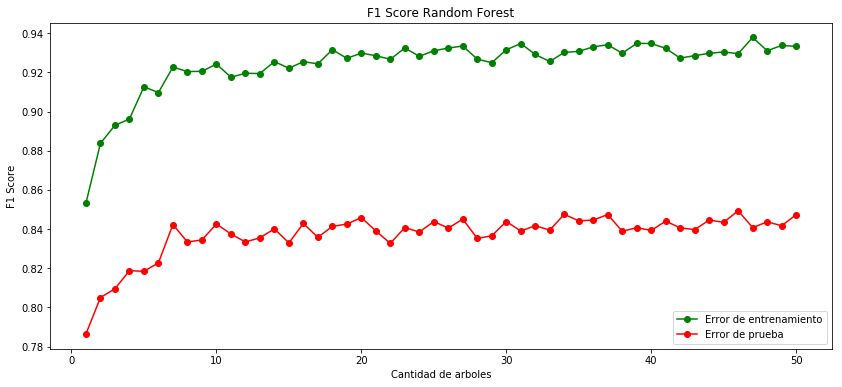

In [54]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

f1_train = []
f1_test  = []

# Variar cantidad de arboles
trees = range(1,51)
for n in trees:
    model = RandomForestClassifier(n_estimators=n,max_depth=10,n_jobs=-1)
    model.fit(X_train,y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    f1_train.append(f1_score(y_train, y_pred_train))
    f1_test.append(f1_score(y_test, y_pred_test))
    
f,axarr = plt.subplots(1,figsize=(14,6))
axarr.plot(trees,f1_train,'go-',label="Error de entrenamiento")
axarr.plot(trees,f1_test,'ro-',label="Error de prueba")
axarr.set_title("F1 Score Random Forest")
axarr.set_xlabel('Cantidad de arboles')
axarr.set_ylabel('F1 Score')
#axarr.set_xscale('log')
axarr.legend(loc="lower right", fancybox= True)
plt.show()









Entrene un ensamblador de arboles de multiples niveles, mediante la tecnica de AdaBoost. Vare la
cantidad de arboles de decision utilizados en el ensamblado (n estimators), realice un graco resumen
del F1-score de entrenamiento y de pruebas en funcion de este hiper-parametro. Compare y analice con
la tecnica utilizada en d).

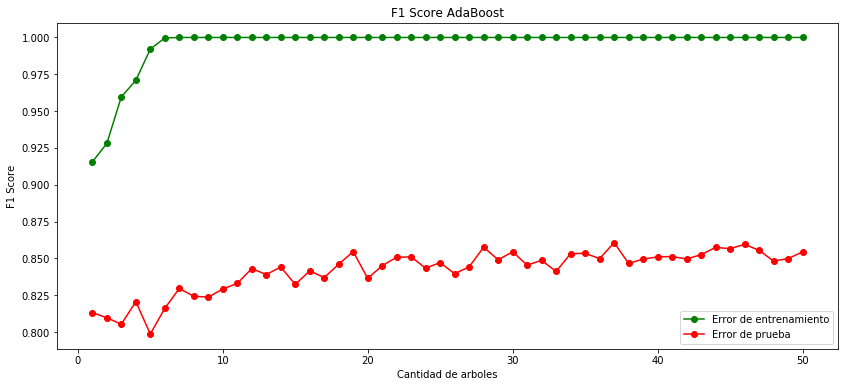

In [57]:
from sklearn.ensemble import AdaBoostClassifier


f1_train = []
f1_test  = []

# Variar cantidad de arboles
trees = range(1,51)
for n in trees:
    model = AdaBoostClassifier(base_estimator=Tree(max_depth=10),n_estimators=n)
    model.fit(X_train,y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    f1_train.append(f1_score(y_train, y_pred_train))
    f1_test.append(f1_score(y_test, y_pred_test))
    
f,axarr = plt.subplots(1,figsize=(14,6))
axarr.plot(trees,f1_train,'go-',label="Error de entrenamiento")
axarr.plot(trees,f1_test,'ro-',label="Error de prueba")
axarr.set_title("F1 Score AdaBoost")
axarr.set_xlabel('Cantidad de arboles')
axarr.set_ylabel('F1 Score')
#axarr.set_xscale('log')
axarr.legend(loc="lower right", fancybox= True)
plt.show()

(f) Entrene alguna otra maquina de aprendizaje, elegida por usted, para resolver este problema. Elija los
hiper-parametros que estime convenientes intentando aumentar el F1-score obtenido por los algoritmos
anteriores. Compare y analice estas 4 maneras de resolver el problema denido en b).
### Quizás una red neuronal

(g) Dena un criterio para estimar la importancia de los distintos atributos en el ensamblado de Ran-
dom Forest, implementelo sobre alguno de los ensambladores entrenados en d), haga un ranking de
importancia de atributos >Es posible implementar este criterio sobre una tecnica de boost como lo es
AdaBoost?